# Real-world Data Wrangling

For this project, you'll put into practice the skills you've learned throughout the course by gathering and refining real-world data using two datasets of your choosing.

You'll retrieve and extract the data, assess it both programmatically and visually, focusing on elements of data quality and structure. Following this, you'll devise and implement a data cleaning strategy. The refined data will then be stored in your selected database or data store, where it will be merged and analyzed to address a research question utilizing the combined datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 0. Prepare libraries

In [57]:
!pip install -r requirements.txt

  Using cached entrypoints-0.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached exceptiongroup-1.1.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached fonttools-4.43.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (152 kB)
  Using cached importlib_metadata-6.8.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached ipykernel-6.25.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached ipython-8.12.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached jsonschema-4.19.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached jupyter_events-0.8.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached jupyter_client-7.4.9-py3-none-any.whl.metadata (8.5 kB)
  Using cached anyio-4.0.0-py3-none-any.whl.metadata (4.5 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached asttoken

  Using cached cffi-1.16.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (1.5 kB)
  Using cached charset_normalizer-3.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (32 kB)
  Using cached comm-0.1.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Using cached jupyter_core-5.4.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached jupyter_server-2.8.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached jupyterlab-4.0.7-py3-none-any.whl.metadata (15 kB)
  Using cached jupyterlab_server-2.25.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached matplotlib-3.7.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached nbconvert-7.9.2-py3-none-any.whl.metadata (7.9 kB)
  Using cached nest_asyncio-1.5.8-py3-none-any.whl.metadata (2.8 kB)
  Using cached notebook-7.0.5-py3-none-any.whl.metadata (10 kB)
  Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached overrides-7.4.0-py3-none-an

Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
Using cached exceptiongroup-1.1.3-py3-none-any.whl (14 kB)
Using cached fonttools-4.43.1-cp311-cp311-macosx_10_9_universal2.whl (2.7 MB)
Using cached importlib_metadata-6.8.0-py3-none-any.whl (22 kB)
Using cached importlib_resources-6.1.0-py3-none-any.whl (33 kB)
Using cached ipykernel-6.25.2-py3-none-any.whl (154 kB)
Using cached ipython-8.12.2-py3-none-any.whl (797 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
Using cached jsonschema-4.19.1-py3-none-any.whl (83 kB)
Using cached jupyter_events-0.8.0-py3-none-any.whl (18 kB)
Using cached jupyter_client-7.4.9-py3-none-any.whl (133 kB)
Using cached anyio-4.0.0-py3-none-any.whl (83 kB)
Using cached argon2_cffi-23.1.0-py3-none-any.whl (15 kB)
Using cached arrow-1.3.0-py3-none-any.whl (66 kB)
Using cached asttokens-2.4.0-py2.py3-none-any.whl (27 kB)
Using cached Babel-2.13.0-py3-none-any.whl (10.1 MB)
Using cached backports.functools_lru_cache-1.6.5-py2.py3-none-any.whl (6.

In [366]:
import pandas as pd
import numpy as np
import json
import zipfile
import os
import shutil
import ast
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
I have previously worked with a dataset containing information on 5000 movies from TMDB and conducted various analyses. Despite searching through Google Dataset Search, the U.S. Government’s open data portal, and the UCI Machine Learning Repository, I was unable to find a suitable dataset to complement the TMDB data. As a result, I've opted to utilize a dataset from grouplens.org, specifically the "MovieLens" dataset, which consists of 100,000 ratings and 3,600 tag applications across 9,000 movies by 600 users (last updated in September 2018).

Research question: Is it feasible to merge these two datasets while preserving the integrity of the data?

### **1.2.** Gather at least two datasets using two different data gathering methods
- Download data manually
- Programmatically downloading files from a URL
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

#### **Dataset 1**

Type: CSV File

Method: The data was acquired through manual downloads from Kaggle's platform.

The dataset was obtained from the following link: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

Dataset variables:

*   *Variable 1: budget* - Amount spent on the production of the movie.
*   *Variable 2: id* - Unique identifier for each movie in the dataset.
*   *Variable 3: homepage* - Link to the movie's official website (if available).
*   *Variable 4: original_language* - Language the movie was originally filmed in.
*   *Variable 5: original_title* - The movie's title before translation or adaptation.
*   *Variable 6: genres* - Categories the movie falls under (e.g., comedy, action, drama).
*   *Variable 7: popularity* - A measure of how popular the movie was.
*   *Variable 8: release_date* - Date the movie was released.
*   *Variable 9: runtime* - Length of the movie in minutes.
*   *Variable 10: vote_average* - Average user rating of the movie on a scale (likely 1-10).
*   *Variable 11: vote_count* - Total number of users who rated the movie.
*   *etc.*

In [234]:
# Read the CSV file into a DataFrame
pd.read_csv('tmdb_5000_movies.csv')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

#### Dataset 2

Type: CSV File

Method: The data was obtained through programmatically downloading files from grouplens.org.

Link dataset: https://grouplens.org/datasets/movielens/latest/

Dataset variables:
*   *Variable 1: movieId* - the unique identification number for each movie in the dataset.
*   *Variable 2: imdbId* - The identification number of the movie within the IMDB database.
*   *Variable 3: tmdbId* - The identification number of the movie within the TMDB database.
*   *Variable 4: title* - the title of each respective movie.
*   *Variable 5: genres* - The genres of the movie.
*   *Variable 6: userId* - The identification number of the user who rated the movie.
*   *Variable 7: rating* - The rating given by the user for the movie.
*   *Variable 8: timestamp* - The timestamp when the rating was given.

In [240]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip -P movies

--2024-04-13 19:34:17--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘movies/ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   355KB/s    in 2.7s    

2024-04-13 19:34:21 (355 KB/s) - ‘movies/ml-latest-small.zip’ saved [978202/978202]



In [241]:
# Open the zip file
with zipfile.ZipFile("movies/ml-latest-small.zip", "r") as zip_ref:
    # Extract the contents to the specified directory
    zip_ref.extractall("movies/")
    # Remove the zip file after extraction
    os.remove("movies/ml-latest-small.zip")

In [242]:
# Define file paths
links_file = os.path.join('movies', 'ml-latest-small', 'links.csv')
movies_file = os.path.join('movies', 'ml-latest-small', 'movies.csv')
output_file = os.path.join('movies', 'movielens.csv')

# Read the 'links.csv' and 'movies.csv' files
df_links = pd.read_csv(links_file)
df_movies = pd.read_csv(movies_file)

# Merge the DataFrames on 'movieId'
df_movielens = pd.merge(df_links, df_movies, how='inner', on='movieId')

# Save the merged DataFrame to a new CSV file
df_movielens.to_csv(output_file, index=False)

# Display the merged DataFrame
df_movielens

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Display their shapes and primary keys, and show the first few rows of each dataset.

In [243]:
# Load the datasets
tmdb_movies = pd.read_csv('tmdb_5000_movies.csv')
movielens = pd.read_csv('movies/movielens.csv')

# Display the shape and primary key information of each dataset
print("TMDB Movies Dataset:")
print(f"Shape: {tmdb_movies.shape}")
print(f"Primary Key: id\n")

print("Movielens Dataset:")
print(f"Shape: {movielens.shape}")
print(f"Primary Key: movieId\n")

# Display the first few rows of each dataset
print("First few rows of TMDB Movies Dataset:")
print(tmdb_movies.head())

print("\nFirst few rows of Movielens Dataset:")
print(movielens.head())

TMDB Movies Dataset:
Shape: (4803, 20)
Primary Key: id

Movielens Dataset:
Shape: (9742, 5)
Primary Key: movieId

First few rows of TMDB Movies Dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463

## 2. Assess data
Assess the data according to data quality and tidiness metrics using the report below.

### Quality Issue 1:

In [244]:
df_tmbd_5000.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""na...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""na...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""na...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""na...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [245]:
# Check the basic information about the DataFrame:
df_tmbd_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [246]:
df_tmbd_5000.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4802,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,2002-12-27 23:45:54.352353280,8.226064e+07,106.875859,6.092172,690.217989
min,0.000000e+00,5.000000,0.000000,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,1999-07-14 00:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,2005-10-03 00:00:00,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,2011-02-16 00:00:00,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,4.072239e+07,88694.614033,31.816650,NaN,1.628571e+08,22.611935,1.194612,1234.585891


In [247]:
# Display unique values of the 'status' column
df_tmbd_5000['status'].unique()

['Released', 'Post Production', 'Rumored']
Categories (3, object): ['Post Production', 'Released', 'Rumored']

In [248]:
# Check for missing values in the DataFrame
missing_values = df_tmbd_5000.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [249]:
df_tmbd_5000.original_language.unique()

['en', 'ja', 'fr', 'zh', 'es', ..., 'fa', 'no', 'sl', 'ps', 'el']
Length: 37
Categories (37, object): ['af', 'ar', 'cn', 'cs', ..., 'tr', 'vi', 'xx', 'zh']

In [250]:
# Display summary statistics of numerical columns
summary_stats = df_tmbd_5000.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
              budget             id   popularity  \
count  4.803000e+03    4803.000000  4803.000000   
mean   2.904504e+07   57165.484281    21.492301   
min    0.000000e+00       5.000000     0.000000   
25%    7.900000e+05    9014.500000     4.668070   
50%    1.500000e+07   14629.000000    12.921594   
75%    4.000000e+07   58610.500000    28.313505   
max    3.800000e+08  459488.000000   875.581305   
std    4.072239e+07   88694.614033    31.816650   

                        release_date       revenue      runtime  vote_average  \
count                           4802  4.803000e+03  4801.000000   4803.000000   
mean   2002-12-27 23:45:54.352353280  8.226064e+07   106.875859      6.092172   
min              1916-09-04 00:00:00  0.000000e+00     0.000000      0.000000   
25%              1999-07-14 00:00:00  0.000000e+00    94.000000      5.600000   
50%              2005-10-03 00:00:00  1.917000e+07   103.000000      6.200000   
75%              2011-02-16 00:00

In [251]:
df_movielens.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [252]:
# Check for outliers in numerical columns
outliers = df_tmbd_5000[(df_tmbd_5000['budget'] > 100000000) | (df_tmbd_5000['revenue'] > 1000000000)]
print("Outliers:\n", outliers)

Outliers:
          budget                                             genres  \
0     237000000  [[{"id": 28, "name": "Action"}, {"id": 12, "na...   
1     300000000  [[{"id": 12, "name": "Adventure"}, {"id": 14, ...   
2     245000000  [[{"id": 28, "name": "Action"}, {"id": 12, "na...   
3     250000000  [[{"id": 28, "name": "Action"}, {"id": 80, "na...   
4     260000000  [[{"id": 28, "name": "Action"}, {"id": 12, "na...   
...         ...                                                ...   
546    74000000  [[{"id": 10751, "name": "Family"}, {"id": 16, ...   
565   150000000  [[{"id": 12, "name": "Adventure"}, {"id": 16, ...   
566   120000000  [[{"id": 16, "name": "Animation"}, {"id": 12, ...   
692   150000000  [[{"id": 16, "name": "Animation"}, {"id": 1075...   
1062  120000000  [[{"id": 12, "name": "Adventure"}, {"id": 16, ...   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          htt

In [219]:
df_movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9742 non-null   object 
 4   genres   9742 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 380.7+ KB


In [220]:
df_movielens.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


Issue and justification:
- The data type of the release_date column in the tmdb_5000_movies.csv dataset is currently set as object, but it should be datetime for proper temporal analysis.
- The tmdbId column in the movielens.csv dataset is currently stored as float, whereas it should be an integer to accurately represent unique identifiers.
- The status and original_language columns in the tmdb_5000_movies.csv dataset have a limited number of unique values, suggesting they should be categorical data types for efficient storage and analysis.

### Quality Issue 2:

In [253]:
# Calculate the percentage of missing values in the 'homepage' column
missing_percentage = (df_tmbd_5000['homepage'].isnull().sum() / df_tmbd_5000.shape[0]) * 100
print("Percentage of missing values in the 'homepage' column:", missing_percentage)

Percentage of missing values in the 'homepage' column: 64.35561107641058


In [254]:
df_tmbd_5000.release_date.duplicated().sum()

1522

In [255]:
# Iterate over columns with object data type
for col in df_tmbd_5000.select_dtypes(include=['object']).columns:
    # Count the number of rows where the value in each column is equal to '[]'
    count = len(df_tmbd_5000[df_tmbd_5000[col] == '[]'])
    # Print the column name and count of rows with '[]'
    print(f"Column '{col}': {count}")

Column 'genres': 0
Column 'homepage': 0
Column 'keywords': 412
Column 'original_title': 0
Column 'overview': 0
Column 'production_companies': 351
Column 'production_countries': 174
Column 'spoken_languages': 86
Column 'tagline': 0
Column 'title': 0


Issue and justification:
- In the 'tmdb_5000_movies.csv' dataset, the proportion of missing values in the 'homepage' column is 64.35%. The missing values are represented by 'NaN' values, indicating a substantial amount of incomplete data.
- Additionally, the dataset contains empty lists represented by '[]' values in columns such as 'genres', 'keywords', 'production_companies', 'production_countries', and 'spoken_languages'. These empty lists should be treated as missing values and represented by 'NaN' instead.


### Tidiness Issue 1:

In [256]:
# Print a header for better display
print("Movie Titles:")
# Display the first few rows of the 'title' column
print(df_movielens['title'].head())

Movie Titles:
0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object


In [257]:
# Extract release year from the 'title' column using regular expression
release_years = df_movielens['title'].str.extract(r'\((\d{4})\)')
# Count the occurrences of each release year and display in a structured format
release_year_counts = release_years.value_counts().reset_index()
release_year_counts.columns = ['Release Year', 'Count']
print("Release Year Distribution:")
print(release_year_counts)

Release Year Distribution:
    Release Year  Count
0           2002    311
1           2006    295
2           2001    294
3           2007    284
4           2000    283
..           ...    ...
101         1919      1
102         1917      1
103         1915      1
104         1908      1
105         1902      1

[106 rows x 2 columns]


In [258]:
# Extract movie title and year of release into separate columns
df_movielens[['title', 'year']] = df_movielens['title'].str.extract(r'^(.*)\s\((\d{4})\)$')

# Display the first few rows to verify the separation
print(df_movielens[['title', 'year']].head())

                         title  year
0                    Toy Story  1995
1                      Jumanji  1995
2             Grumpier Old Men  1995
3            Waiting to Exhale  1995
4  Father of the Bride Part II  1995


Issue and justification:
- To address the issue of multiple variables stored in the 'title' column, where the movie title and year of release are combined in the format 'Title (Year)', we can split this column into two separate columns: 'title' for the movie title and 'year' for the release year. This separation can be achieved using string manipulation techniques or regular expressions to extract the relevant information.

### Tidiness Issue 2: 

In [284]:
first_movie_genres = df_tmbd_5000.at[0, 'genres']
print(first_movie_genres)

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]']


In [285]:
first_movie_genres = df_movielens.loc[0, 'genres']
print(first_movie_genres)

Adventure|Animation|Children|Comedy|Fantasy


In [286]:
genres_list = df_movielens.genres[0].split('|')
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']


Issue and justification: 
- The 'genres' columns in both datasets store variables in different formats. To standardize the format, they should be merged into a single column using the format list[Genre1, Genre2, ...].

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [288]:
df_tmbd_5000_clean = df_tmbd_5000.copy()
df_movielens_clean = df_movielens.copy()

### **Quality Issue 1: Wrong data type**

Issue and justification:
- The 'release_date' column in the tmdb_5000_movies.csv dataset is currently of object data type instead of datetime.
- In the movielens.csv dataset, the 'tmdbId' column is represented as float instead of int.
- Both the 'status' and 'original_language' columns in the tmdb_5000_movies.csv dataset have a small number of unique values, indicating they should be categorical data types.

In [291]:
# Clean release_date column by converting it to datetime format
df_tmbd_5000_clean['release_date'] = pd.to_datetime(df_tmbd_5000_clean['release_date'], errors='coerce')

# Convert status and original_language columns to categorical data type
df_tmbd_5000_clean['status'] = df_tmbd_5000_clean['status'].astype('category')
df_tmbd_5000_clean['original_language'] = df_tmbd_5000_clean['original_language'].astype('category')

# Drop rows with missing values in df_movielens_clean DataFrame
df_movielens_clean.dropna(inplace=True)

# Convert tmdbId column to integer format
df_movielens_clean['tmdbId'] = df_movielens_clean['tmdbId'].astype('int64')

Validate cleaning:

In [292]:
df_tmbd_5000_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [194]:
df_movielens_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 0 to 9741
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9711 non-null   int64 
 1   imdbId   9711 non-null   int64 
 2   tmdbId   9711 non-null   int64 
 3   title    9711 non-null   object
 4   genres   9711 non-null   object
 5   year     9711 non-null   object
dtypes: int64(3), object(3)
memory usage: 531.1+ KB


Justification:
- In the tmdb_5000_movies.csv dataset, the column release_date has been converted to datetime data type, while the column tmdbId in the movielens.csv dataset is now of integer type. Additionally, the columns status and original_language in the tmdb_5000_movies.csv dataset have been categorized.

### **Quality Issue 2: Non value**

Issue and justification:
- Approximately 64.35% of the values in the homepage column of the tmdb_5000_movies.csv dataset are missing and represented by NaN values.
- In the tmdb_5000_movies.csv dataset, the columns genres, keywords, production_companies, production_countries, and spoken_languages contain empty lists represented by [], which should be replaced with NaN values.

In [296]:
# Check if 'homepage' column exists before dropping it
if 'homepage' in df_tmbd_5000_clean.columns:
    df_tmbd_5000_clean.drop(columns=['homepage'], inplace=True)

# Convert lists to strings
df_tmbd_5000_clean = df_tmbd_5000_clean.applymap(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Drop duplicate rows
df_tmbd_5000_clean.drop_duplicates(inplace=True)

# Replace empty list values with NaN
df_tmbd_5000_clean = df_tmbd_5000_clean.applymap(lambda x: np.nan if x == '[]' else x)

# Drop rows with missing values
df_tmbd_5000_clean.dropna(inplace=True)

# Display the cleaned DataFrame
df_tmbd_5000_clean

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,

Validate cleaning:

In [85]:
df_tmbd_5000_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3666 entries, 0 to 4798
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3666 non-null   int64         
 1   genres                3666 non-null   object        
 2   id                    3666 non-null   int64         
 3   keywords              3666 non-null   object        
 4   original_language     3666 non-null   object        
 5   original_title        3666 non-null   object        
 6   overview              3666 non-null   object        
 7   popularity            3666 non-null   float64       
 8   production_companies  3666 non-null   object        
 9   production_countries  3666 non-null   object        
 10  release_date          3666 non-null   datetime64[ns]
 11  revenue               3666 non-null   int64         
 12  runtime               3666 non-null   float64       
 13  spoken_languages      3

Justification: 
- After replacing the [] values with NaN and dropping the homepage column, there are no missing values in the tmdb_5000_movies.csv dataset.

### **Tidiness Issue 1: Multiple variables are stored in a single column, violating the principle of tidy data. **

Issue and justification: 
- The column "title" in the dataset contains both the movie title and the year of release in the format "Title (Year)". It should be split into two separate columns: "title" and "year".


In [297]:
# Extract the year from the title and create a new column
df_movielens_clean['year'] = df_movielens_clean['title'].str.extract(r'\((\d{4})\)')

# Extract the title without the year and update the title column
df_movielens_clean['title'] = df_movielens_clean['title'].apply(lambda x: x.split(' (')[0])

Validate cleaning:

In [298]:
df_movielens_clean.head()

,movieId,imdbId,tmdbId,title,genres,year
0,1,114709,862,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,NaN
1,2,113497,8844,Jumanji,Adventure|Children|Fantasy,NaN
2,3,113228,15602,Grumpier Old Men,Comedy|Romance,NaN
3,4,114885,31357,Waiting to Exhale,Comedy|Drama|Romance,NaN
4,5,113041,11862,Father of the Bride Part II,Comedy,NaN


Justification: 
- After splitting the title column into title and year columns, the title column exclusively holds movie titles, while the year column exclusively contains the release years.

- For instance, the title column might contain Avatar, and the year column might contain 2009.

### **Tidiness Issue 2: Variables are stored in both columns, leading to redundancy and potential inconsistencies in the dataset.**

Issue and justification: 
- To address the inconsistency in the genres column format between the two datasets, the column should be merged into a single column with a consistent format. Specifically, the genres from both datasets should be combined into a list format [Genre1, Genre2, ...] to ensure uniformity and ease of analysis.

In [299]:
# For df_tmbd_5000_clean
df_tmbd_5000_clean['genres'] = df_tmbd_5000_clean['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)])

# For df_movielens_clean
df_movielens_clean['genres'] = df_movielens_clean['genres'].apply(lambda x: x.split('|'))

Validate cleaning:

In [300]:
df_tmbd_5000_clean.tail()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4791,13,[Horror],157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1
4792,20000,"[Crime, Horror, Mystery, Thriller]",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63
4795,0,[Drama],124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,6.0,1
4796,7000,"[Science Fiction, Drama, Thriller]",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What happens if it actually works?,Primer,6.9,658
4798,220000,"[Action, Crime, Thriller]",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238


In [301]:
df_movielens_clean.tail()

,movieId,imdbId,tmdbId,title,genres,year
9737,193581,5476944,432131,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",NaN
9738,193583,5914996,445030,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",NaN
9739,193585,6397426,479308,Flint,[Drama],NaN
9740,193587,8391976,483455,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",NaN
9741,193609,101726,37891,Andrew Dice Clay: Dice Rules,[Comedy],NaN


Justification: 
- After processing the genres column, both datasets now have the genres column containing lists of genres.

### **Dropping redundant columns and merging datasets is the next step in our data processing pipeline.**

Combining datasets before performing cleaning steps can be advantageous, depending on the nature of the datasets involved.

In [309]:
# Selecting necessary columns from tmdb_5000_movies dataset
df_tmbd_5000_clean = df_tmbd_5000_clean[['id', 'original_title', 'original_language', 'genres', 'budget', 'release_date', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count']]

# Saving cleaned tmdb_5000_movies dataset to a CSV file
df_tmbd_5000_clean.to_csv('movies/18102023_tmdb_5000_movies_cleaned.csv', index=False)

# Saving cleaned movielens dataset to a CSV file
df_movielens_clean.to_csv('movies/18102023_movielens_cleaned.csv', index=False)

# Merging cleaned datasets on tmdbId and id columns
df_merge = df_movielens_clean.merge(df_tmbd_5000_clean, left_on='tmdbId', right_on='id', how='inner')

# Combining genres from both datasets and removing duplicates
df_merge['genres'] = df_merge['genres_x'] + df_merge['genres_y']
df_merge['genres'] = df_merge['genres'].apply(lambda x: list(set(x)))

# Dropping unnecessary columns
df_merge.drop(columns=['id', 'genres_x', 'genres_y'], inplace=True)

In [310]:
df_merge.head()

,movieId,imdbId,tmdbId,title,year,original_title,original_language,budget,release_date,revenue,runtime,status,vote_average,vote_count,genres
0,10,113189,710,GoldenEye,NaN,GoldenEye,en,58000000,1995-11-16,352194034,130.0,Released,6.6,1174,"[Thriller, Action, Adventure]"
1,11,112346,9087,"American President, The",NaN,The American President,en,62000000,1995-11-17,107879496,106.0,Released,6.5,195,"[Drama, Comedy, Romance]"
2,14,113987,10858,Nixon,NaN,Nixon,en,44000000,1995-12-22,13681765,192.0,Released,7.1,71,"[Drama, History]"
3,15,112760,1408,Cutthroat Island,NaN,Cutthroat Island,en,98000000,1995-12-22,10017322,119.0,Released,5.7,136,"[Action, Adventure, Romance]"
4,16,112641,524,Casino,NaN,Casino,en,52000000,1995-11-22,116112375,178.0,Released,7.8,1307,"[Drama, Crime]"


In [307]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movieId            3106 non-null   int64         
 1   imdbId             3106 non-null   int64         
 2   tmdbId             3106 non-null   int64         
 3   title              3106 non-null   object        
 4   year               0 non-null      object        
 5   original_title     3106 non-null   object        
 6   original_language  3106 non-null   object        
 7   budget             3106 non-null   int64         
 8   release_date       3106 non-null   datetime64[ns]
 9   revenue            3106 non-null   int64         
 10  runtime            3106 non-null   float64       
 11  status             3106 non-null   object        
 12  vote_average       3106 non-null   float64       
 13  vote_count         3106 non-null   int64         
 14  genres  

In [308]:
df_merge.describe()

,movieId,imdbId,tmdbId,budget,release_date,revenue,runtime,vote_average,vote_count
count,3106.000000,3.106000e+03,3106.000000,3.106000e+03,3106,3.106000e+03,3106.000000,3106.000000,3106.000000
mean,39523.126207,6.425470e+05,36441.473599,3.957246e+07,2001-10-18 06:08:06.799742464,1.193582e+08,110.052479,6.341468,993.615905
min,10.000000,6.864000e+03,5.000000,0.000000e+00,1916-09-04 00:00:00,0.000000e+00,25.000000,2.700000,1.000000
25%,3105.000000,1.201708e+05,4379.250000,8.000000e+06,1998-01-30 00:00:00,1.068192e+07,96.000000,5.800000,189.000000
50%,8416.500000,3.302360e+05,10616.500000,2.500000e+07,2004-03-24 12:00:00,5.200396e+07,106.000000,6.400000,476.000000
75%,72873.500000,9.884575e+05,28523.750000,5.500000e+07,2009-10-17 00:00:00,1.472442e+08,120.000000,6.900000,1168.750000
max,163056.000000,5.215952e+06,376659.000000,3.800000e+08,2016-08-17 00:00:00,2.787965e+09,238.000000,10.000000,13752.000000
std,43540.358019,7.506247e+05,66503.080762,4.510814e+07,NaN,1.890858e+08,19.832068,0.840539,1425.418660


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [313]:
df_merge.to_csv('movies/13042024_tmdb_merged.csv', index=False)

Save the cleaned data to folder `data`:
- **13042024_tmdb_5000_movies_clean.csv** 
- **13042024_movielens_clean.csv**
- **13042024_tbdb_merged.csv** 

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Is it feasible to merge the two datasets while ensuring the integrity of the data?


In [315]:
df_merge = pd.read_csv('movies/18102023_tmdb_merged.csv')
df_merge

,movieId,imdbId,tmdbId,title,year,original_title,original_language,budget,release_date,revenue,runtime,status,vote_average,vote_count,genres
0,10,113189,710,GoldenEye,NaN,GoldenEye,en,58000000,1995-11-16,352194034,130.0,Released,6.6,1174,"['Thriller', 'Action', 'Adventure']"
1,11,112346,9087,"American President, The",NaN,The American President,en,62000000,1995-11-17,107879496,106.0,Released,6.5,195,"['Drama', 'Comedy', 'Romance']"
2,14,113987,10858,Nixon,NaN,Nixon,en,44000000,1995-12-22,13681765,192.0,Released,7.1,71,"['Drama', 'History']"
3,15,112760,1408,Cutthroat Island,NaN,Cutthroat Island,en,98000000,1995-12-22,10017322,119.0,Released,5.7,136,"['Action', 'Adventure', 'Romance']"
4,16,112641,524,Casino,NaN,Casino,en,52000000,1995-11-22,116112375,178.0,Released,7.8,1307,"['Drama', 'Crime']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,160644,4193394,340611,Indignation,NaN,Indignation,en,0,2016-07-29,0,110.0,Released,6.8,69,['Drama']
3102,160954,3531824,328387,Nerve,NaN,Nerve,en,20000000,2016-07-27,83707310,96.0,Released,7.1,2181,"['Thriller', 'Drama', 'Crime', 'Mystery', 'Adv..."
3103,161127,1355631,325789,The Infiltrator,NaN,The Infiltrator,en,25000000,2016-07-13,15436808,127.0,Released,6.6,573,"['Thriller', 'Drama', 'Crime']"
3104,161580,4651520,376659,Bad Moms,NaN,Bad Moms,en,20000000,2016-07-28,183936074,100.0,Released,6.3,1252,['Comedy']


Response to the research question: 
- Affirmative, the integration of two datasets is viable while preserving the integrity of the data in the genres column. Following the combination of the datasets, the genres column encapsulates a comprehensive list of genres from both datasets. The correlation between genres and the popularity of movies is depicted in the accompanying visualization.

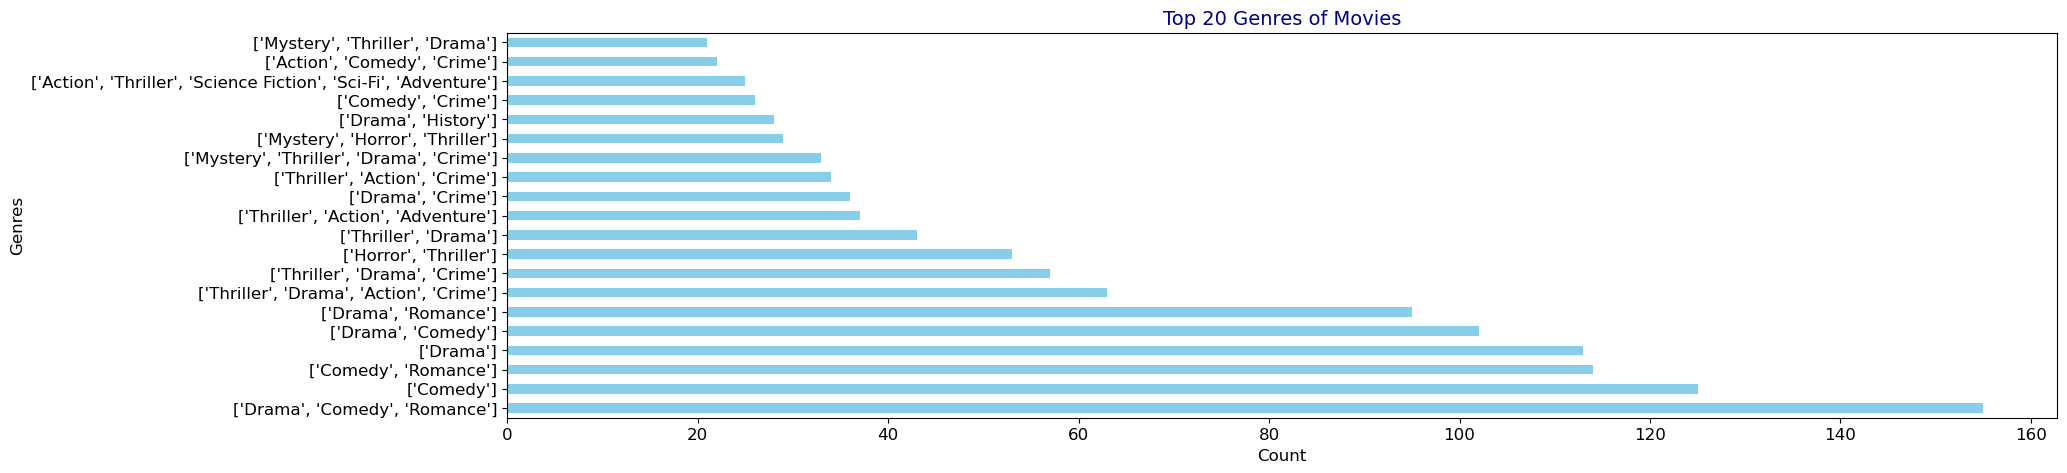

In [332]:
# Plot top 20 genres of movies with varied title color
# Define the figure size
plt.figure(figsize=(20, 5))

# Calculate the top 20 genres and plot them as a horizontal bar chart with skyblue color
top_genres = df_merge['genres'].value_counts(sort=True).head(20)
top_genres.plot(kind='barh', color='skyblue', title='Top 20 Genres of Movies', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Set title of the plot with navy color
plt.title('Top 20 Genres of Movies', fontsize=14, color='navy')

# Show the plot
plt.show()

*Answer to research question:* 
- Analyzing the year column in the processed data reveals a positive correlation between release year and both movie revenue and budget. This trend suggests that movies are becoming increasingly expensive to produce and generate higher earnings over time.

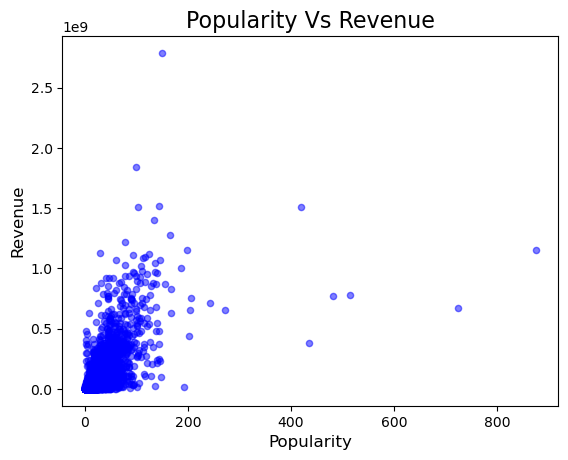

In [373]:
# Scatter plot of Revenue vs Popularity
# Plotting a scatter plot of 'popularity' vs 'revenue' with enhanced readability
df.plot(x='popularity', y='revenue', kind='scatter', alpha=0.5, color='blue')

# Adding title and labels to the plot with larger font size for better visibility
plt.title('Popularity Vs Revenue', fontsize=16)  # Set the title of the plot with larger font size
plt.xlabel('Popularity', fontsize=12)  # Set the label for the x-axis with larger font size
plt.ylabel('Revenue', fontsize=12)  # Set the label for the y-axis with larger font size

# Display the plot
plt.show()

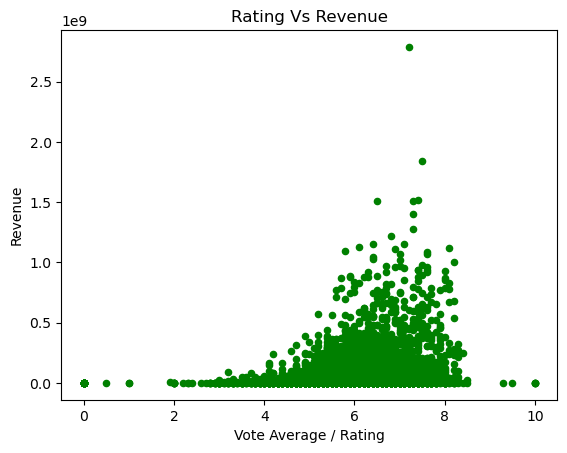

In [376]:
# Scatter plot of Revenue vs Ratings
# Plotting a scatter plot of 'vote_average' vs 'revenue' with a different color
df.plot(x='vote_average', y='revenue', kind='scatter', color='green')

# Adding title and labels to the plot
plt.title('Rating Vs Revenue')  # Set the title of the plot
plt.xlabel('Vote Average / Rating')  # Set the label for the x-axis
plt.ylabel('Revenue')  # Set the label for the y-axis

# Display the plot
plt.show()